# Energy consumption prediction

Here, I use data_energy file to do analysis and train the model to predict the energy consumption.

## Data preparing

Import libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('../OriginalDataset/data_energy.csv',parse_dates=['Date'])

In [8]:
df.head(3)

,LCLid,Date,KWH
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223


In [9]:
df.tail(3)

,LCLid,Date,KWH
3510430,MAC005567,2014-02-26,5.066
3510431,MAC005567,2014-02-27,3.217
3510432,MAC005567,2014-02-28,0.366


In [10]:
print(df.dtypes)

LCLid            object
Date     datetime64[ns]
KWH             float64
dtype: object


Find the number of null values for each feature

In [11]:
null_values=df.isnull().sum()
print(null_values)

LCLid    0
Date     0
KWH      0
dtype: int64


Count the average energy consumption for each day with different LCLid

In [35]:
# Calculate the average energy consumption for each day
daily_energy = df.groupby(['Date'])['KWH'].mean().reset_index()
daily_energy = daily_energy.round(3)
daily_energy = daily_energy.rename(columns={'Date': 'date', 'KWH': 'KWH'})
daily_energy.to_csv('../dataset_for_analysis/data_energy.csv',index=False)

## Explore the relationship between energy consumption and weather

Load the dataset

In [36]:
df_energy=pd.read_csv('../dataset_for_analysis/data_energy.csv',parse_dates=['date'])
df_weather=pd.read_csv('../dataset_for_analysis/data_weather_new1.csv',parse_dates=['date'])

Plot the distribution of energy, mean_temp and precipitation

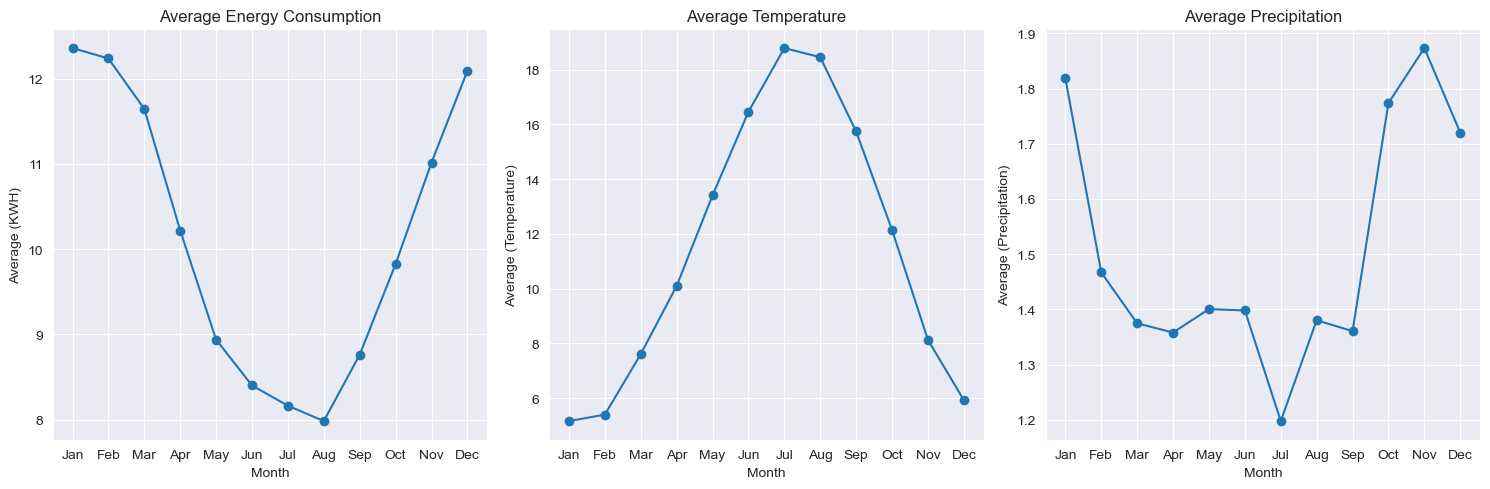

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你有两个DataFrame：df_energy 和 df_weather
# df_energy 包含 'KWH' 列
# df_weather 包含 'mean_temp' 和 'precipitation' 列

# 将"Date"列改为 "date"
df_energy.rename(columns={'Date': 'date'}, inplace=True)
df_weather.rename(columns={'Date': 'date'}, inplace=True)

# 将date列转换为日期类型
df_energy['date'] = pd.to_datetime(df_energy['date'])
df_weather['date'] = pd.to_datetime(df_weather['date'])

# 创建一个包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 子图1：能源消耗在1-12月的平均值变化曲线
energy_monthly_mean = df_energy.groupby(df_energy['date'].dt.month)['KWH'].mean()
axes[0].plot(energy_monthly_mean.index, energy_monthly_mean.values, marker='o', linestyle='-')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].set_title('Average Energy Consumption')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average (KWH)')

# 子图2：平均温度在1-12月的平均值变化曲线
temp_monthly_mean = df_weather.groupby(df_weather['date'].dt.month)['mean_temp'].mean()
axes[1].plot(temp_monthly_mean.index, temp_monthly_mean.values, marker='o', linestyle='-')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].set_title('Average Temperature')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average (Temperature)')

# 子图3：降水量在1-12月的平均值变化曲线
precipitation_monthly_mean = df_weather.groupby(df_weather['date'].dt.month)['precipitation'].mean()
axes[2].plot(precipitation_monthly_mean.index, precipitation_monthly_mean.values, marker='o', linestyle='-')
axes[2].set_xticks(range(1, 13))
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[2].set_title('Average Precipitation')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Average (Precipitation)')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


In [46]:
correlation_energy_temp = df_energy['KWH'].corr(df_weather['mean_temp'])
correlation_energy_precipitation = df_energy['KWH'].corr(df_weather['precipitation'])


In [47]:
correlation_energy_precipitation

0.05467457124562549

In [48]:
correlation_energy_temp

-0.6432841118417084